In [54]:
import pandas as pd
import numpy as np


In [55]:
df = pd.read_csv('result-detection2.csv')
df.head()



,origin_path,detect_path,image_names,left_eye,right_eye,avg_eye,truth,detected
0,./dataset-combine/Mata/Terbuka/1.jpg,./annot/Mata/Terbuka/1.jpg,./dataset-combine/Mata/Terbuka/1.jpg,0.278559,0.281543,0.280051,Terbuka,Tertutup
1,./dataset-combine/Mata/Terbuka/10.jpg,NaN,./dataset-combine/Mata/Terbuka/10.jpg,NaN,NaN,NaN,Terbuka,NaN
2,./dataset-combine/Mata/Terbuka/100.jpg,./annot/Mata/Terbuka/100.jpg,./dataset-combine/Mata/Terbuka/100.jpg,0.426765,0.471541,0.449153,Terbuka,Terbuka
3,./dataset-combine/Mata/Terbuka/101.jpg,./annot/Mata/Terbuka/101.jpg,./dataset-combine/Mata/Terbuka/101.jpg,0.432442,0.504410,0.468426,Terbuka,Terbuka
4,./dataset-combine/Mata/Terbuka/102.jpg,./annot/Mata/Terbuka/102.jpg,./dataset-combine/Mata/Terbuka/102.jpg,0.238770,0.289991,0.264380,Terbuka,Tertutup


In [56]:
def replace_label(val):
    if val == 'Terbuka':
        return 1
    elif val == 'Tertutup':
        return 0
    else:
        return None

In [57]:
df['truth'] = df['truth'].apply(replace_label)
df['detected'] = df['detected'].apply(replace_label)

df.head()

,origin_path,detect_path,image_names,left_eye,right_eye,avg_eye,truth,detected
0,./dataset-combine/Mata/Terbuka/1.jpg,./annot/Mata/Terbuka/1.jpg,./dataset-combine/Mata/Terbuka/1.jpg,0.278559,0.281543,0.280051,1,0.0
1,./dataset-combine/Mata/Terbuka/10.jpg,NaN,./dataset-combine/Mata/Terbuka/10.jpg,NaN,NaN,NaN,1,NaN
2,./dataset-combine/Mata/Terbuka/100.jpg,./annot/Mata/Terbuka/100.jpg,./dataset-combine/Mata/Terbuka/100.jpg,0.426765,0.471541,0.449153,1,1.0
3,./dataset-combine/Mata/Terbuka/101.jpg,./annot/Mata/Terbuka/101.jpg,./dataset-combine/Mata/Terbuka/101.jpg,0.432442,0.504410,0.468426,1,1.0
4,./dataset-combine/Mata/Terbuka/102.jpg,./annot/Mata/Terbuka/102.jpg,./dataset-combine/Mata/Terbuka/102.jpg,0.238770,0.289991,0.264380,1,0.0


In [59]:
df.isnull().sum()

origin_path      0
detect_path    118
image_names      0
left_eye       118
right_eye      118
avg_eye        118
truth            0
detected       118
dtype: int64

In [60]:
df.shape

(913, 8)

In [61]:
df_clean = df.dropna()

# Mendapatkan index baris yang di-drop
dropped_indices = df.index.difference(df_clean.index)
# Menampilkan baris yang di-drop
dropped_rows = df.loc[dropped_indices]


print(df_clean['detected'].value_counts())
print(df_clean['truth'].value_counts())

detected
0.0    444
1.0    351
Name: count, dtype: int64
truth
0    418
1    377
Name: count, dtype: int64


In [62]:
dropped_rows.head()

,origin_path,detect_path,image_names,left_eye,right_eye,avg_eye,truth,detected
1,./dataset-combine/Mata/Terbuka/10.jpg,NaN,./dataset-combine/Mata/Terbuka/10.jpg,NaN,NaN,NaN,1,NaN
7,./dataset-combine/Mata/Terbuka/105.jpg,NaN,./dataset-combine/Mata/Terbuka/105.jpg,NaN,NaN,NaN,1,NaN
12,./dataset-combine/Mata/Terbuka/11.jpg,NaN,./dataset-combine/Mata/Terbuka/11.jpg,NaN,NaN,NaN,1,NaN
19,./dataset-combine/Mata/Terbuka/116.jpg,NaN,./dataset-combine/Mata/Terbuka/116.jpg,NaN,NaN,NaN,1,NaN
28,./dataset-combine/Mata/Terbuka/124.jpg,NaN,./dataset-combine/Mata/Terbuka/124.jpg,NaN,NaN,NaN,1,NaN


In [73]:
mismatched_rows = df[df['truth'] != df['detected']]
print("Baris dengan nilai truth dan detected yang tidak sama:")
print(len(mismatched_rows.values))
mismatched_rows.head()

Baris dengan nilai truth dan detected yang tidak sama:
202


,origin_path,detect_path,image_names,left_eye,right_eye,avg_eye,truth,detected
0,./dataset-kurasi/Mata/Terbuka/1.jpg,./annot2/Mata/Terbuka/1.jpg,./dataset-kurasi/Mata/Terbuka/1.jpg,0.278590,0.280236,0.279413,1,0.0
1,./dataset-kurasi/Mata/Terbuka/100.jpg,NaN,./dataset-kurasi/Mata/Terbuka/100.jpg,NaN,NaN,NaN,1,NaN
8,./dataset-kurasi/Mata/Terbuka/108.jpg,./annot2/Mata/Terbuka/108.jpg,./dataset-kurasi/Mata/Terbuka/108.jpg,0.207085,0.244759,0.225922,1,0.0
17,./dataset-kurasi/Mata/Terbuka/118.jpg,./annot2/Mata/Terbuka/118.jpg,./dataset-kurasi/Mata/Terbuka/118.jpg,0.282535,0.272663,0.277599,1,0.0
18,./dataset-kurasi/Mata/Terbuka/119.jpg,./annot2/Mata/Terbuka/119.jpg,./dataset-kurasi/Mata/Terbuka/119.jpg,0.194363,0.251291,0.222827,1,0.0


In [75]:
deleted_data_list = mismatched_rows['origin_path'].values[:150]
print(deleted_data_list[:5], "\n", deleted_data_list[-5:])

import csv

deleted_data_list = list(deleted_data_list)  # Convert numpy array to list if necessary
with open('deleted_data_list.csv', 'w', newline='') as file:
    writer = csv.writer(file)
    for item in deleted_data_list:
        writer.writerow([item])


['./dataset-kurasi/Mata/Terbuka/1.jpg'
 './dataset-kurasi/Mata/Terbuka/100.jpg'
 './dataset-kurasi/Mata/Terbuka/108.jpg'
 './dataset-kurasi/Mata/Terbuka/118.jpg'
 './dataset-kurasi/Mata/Terbuka/119.jpg'] 
 ['./dataset-kurasi/Mata/Tertutup/237.jpg'
 './dataset-kurasi/Mata/Tertutup/242.jpg'
 './dataset-kurasi/Mata/Tertutup/253.jpg'
 './dataset-kurasi/Mata/Tertutup/262.jpg'
 './dataset-kurasi/Mata/Tertutup/273.jpg']


In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt 
import seaborn as sns

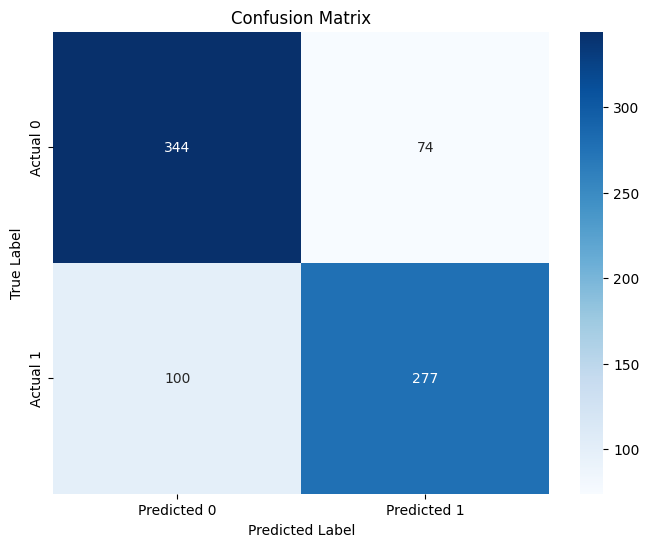

In [37]:
# Hitung confusion matrix
cm = confusion_matrix(df_clean['truth'], df_clean['detected'])

# Buat dataframe untuk confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [38]:
# Hitung metrik
accuracy = accuracy_score(df_clean['truth'], df_clean['detected'])
precision = precision_score(df_clean['truth'], df_clean['detected'])
recall = recall_score(df_clean['truth'], df_clean['detected'])
f1 = f1_score(df_clean['truth'], df_clean['detected'])

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Tampilkan metrik
print("\nMetrik Evaluasi:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[344  74]
 [100 277]]

Metrik Evaluasi:
Akurasi: 0.78
Precision: 0.79
Recall: 0.73
F1 Score: 0.76


# Testing Dataset Kurasi

In [82]:
df = pd.read_csv('result-detection-kurasi.csv')
df.head()

,origin_path,detect_path,image_names,left_eye,right_eye,avg_eye,truth,detected
0,./dataset-kurasi/Mata/Terbuka/10.jpg,NaN,./dataset-kurasi/Mata/Terbuka/10.jpg,NaN,NaN,NaN,Terbuka,NaN
1,./dataset-kurasi/Mata/Terbuka/101.jpg,./annot2/Mata/Terbuka/101.jpg,./dataset-kurasi/Mata/Terbuka/101.jpg,0.439963,0.483657,0.461810,Terbuka,Terbuka
2,./dataset-kurasi/Mata/Terbuka/102.jpg,./annot2/Mata/Terbuka/102.jpg,./dataset-kurasi/Mata/Terbuka/102.jpg,0.230202,0.318786,0.274494,Terbuka,Terbuka
3,./dataset-kurasi/Mata/Terbuka/103.jpg,./annot2/Mata/Terbuka/103.jpg,./dataset-kurasi/Mata/Terbuka/103.jpg,0.266652,0.367490,0.317071,Terbuka,Terbuka
4,./dataset-kurasi/Mata/Terbuka/104.jpg,./annot2/Mata/Terbuka/104.jpg,./dataset-kurasi/Mata/Terbuka/104.jpg,0.313893,0.251680,0.282786,Terbuka,Terbuka


In [83]:
def replace_label(val):
    if val == 'Terbuka':
        return 1
    elif val == 'Tertutup':
        return 0
    else:
        return None
    
df['truth'] = df['truth'].apply(replace_label)
df['detected'] = df['detected'].apply(replace_label)

df.head()

,origin_path,detect_path,image_names,left_eye,right_eye,avg_eye,truth,detected
0,./dataset-kurasi/Mata/Terbuka/10.jpg,NaN,./dataset-kurasi/Mata/Terbuka/10.jpg,NaN,NaN,NaN,1,NaN
1,./dataset-kurasi/Mata/Terbuka/101.jpg,./annot2/Mata/Terbuka/101.jpg,./dataset-kurasi/Mata/Terbuka/101.jpg,0.439963,0.483657,0.461810,1,1.0
2,./dataset-kurasi/Mata/Terbuka/102.jpg,./annot2/Mata/Terbuka/102.jpg,./dataset-kurasi/Mata/Terbuka/102.jpg,0.230202,0.318786,0.274494,1,1.0
3,./dataset-kurasi/Mata/Terbuka/103.jpg,./annot2/Mata/Terbuka/103.jpg,./dataset-kurasi/Mata/Terbuka/103.jpg,0.266652,0.367490,0.317071,1,1.0
4,./dataset-kurasi/Mata/Terbuka/104.jpg,./annot2/Mata/Terbuka/104.jpg,./dataset-kurasi/Mata/Terbuka/104.jpg,0.313893,0.251680,0.282786,1,1.0


In [84]:
df_clean = df.dropna()

# Mendapatkan index baris yang di-drop
dropped_indices = df.index.difference(df_clean.index)
# Menampilkan baris yang di-drop
dropped_rows = df.loc[dropped_indices]


print(df_clean['detected'].value_counts())
print(df_clean['truth'].value_counts())

detected
0.0    357
1.0    310
Name: count, dtype: int64
truth
0    385
1    282
Name: count, dtype: int64


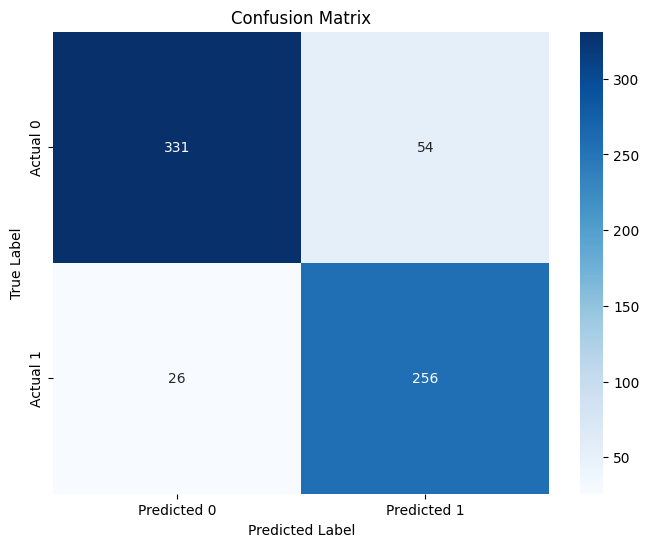

In [85]:
# Hitung confusion matrix
cm = confusion_matrix(df_clean['truth'], df_clean['detected'])

# Buat dataframe untuk confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual 0', 'Actual 1'], columns=['Predicted 0', 'Predicted 1'])

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [86]:
# Hitung metrik
accuracy = accuracy_score(df_clean['truth'], df_clean['detected'])
precision = precision_score(df_clean['truth'], df_clean['detected'])
recall = recall_score(df_clean['truth'], df_clean['detected'])
f1 = f1_score(df_clean['truth'], df_clean['detected'])

# Tampilkan confusion matrix
print("Confusion Matrix:")
print(cm)

# Tampilkan metrik
print("\nMetrik Evaluasi:")
print(f"Akurasi: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Confusion Matrix:
[[331  54]
 [ 26 256]]

Metrik Evaluasi:
Akurasi: 0.88
Precision: 0.83
Recall: 0.91
F1 Score: 0.86
